# Notatki do pracowni trzeciej

In [5]:
using PyPlot
include("program.jl");

In [63]:
function MaxMistake(x1, x2)
    return max([ abs(x1[i]-x2[i]) for i=1:length(x1)]...)
end

function animate(f, fgood; N=5, iters=10, x0=0, y0=0, ymin=0, ymax=3, interval=1.5)
    Y = PicardIter(f, x0, y0, N, iters)
    pygui(false)
    for i = 1:iters
        data = ChebDraw(Y[i], -1, 1, 100)
        data2 = FDraw(fgood, -1, 1, 100)
        IJulia.clear_output(true)
        fig, ax = subplots()
        ax[:plot](data[1], data[2], "-", color="red", label="wynik algorytmu", linewidth=1, alpha=1.0)
        ax[:plot](data2[1], data2[2], "-", color="blue", label="fgood", linewidth=1, alpha=1.0)
        
        ax[:text](1.1, ymax-(0.1)*(ymax-ymin)/3 , @sprintf("Iteracja : %d", i))
        ax[:text](1.1, ymax-0.3*(ymax-ymin)/3, @sprintf("Maksymalny błąd : %f", MaxMistake(data[2], data2[2])))
        
        axis([-1,1, ymin, ymax])
        display(gcf())
        clf()
        sleep(interval)
    end
end;

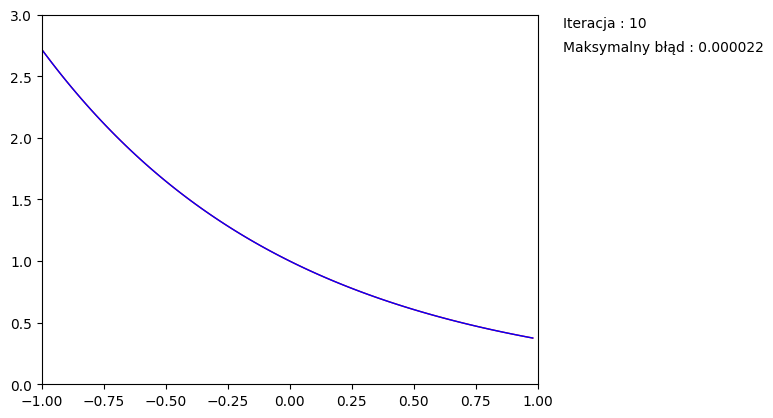

In [64]:
function f(y, x)
    -y
end

function solution(x)
    e^(-x)
end

animate(f, solution, x0=0.0, y0=1.0, iters=10, N=5)


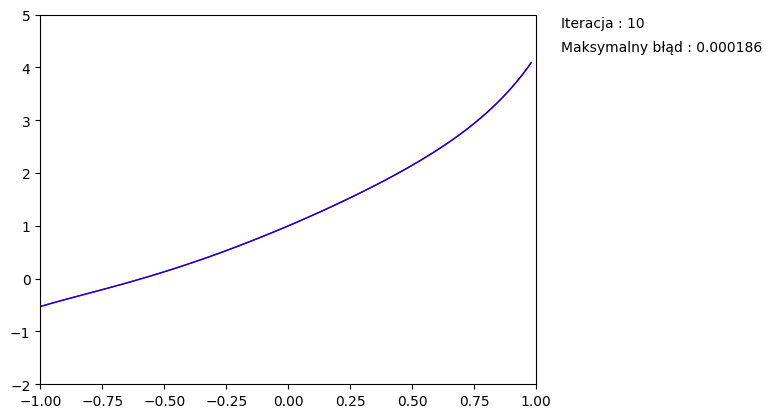

In [79]:
function f(y, x) 
     2*(cos(x)^2) + y*tan(x)
end

function solution(x)
    2sin(x)/cos(x) -2*sin(x)^3/(3*cos(x)) + 1/cos(x)
end

animate(f, solution, x0=0.0, y0=1.0, iters=10, N=10, ymin=-2, ymax=5)

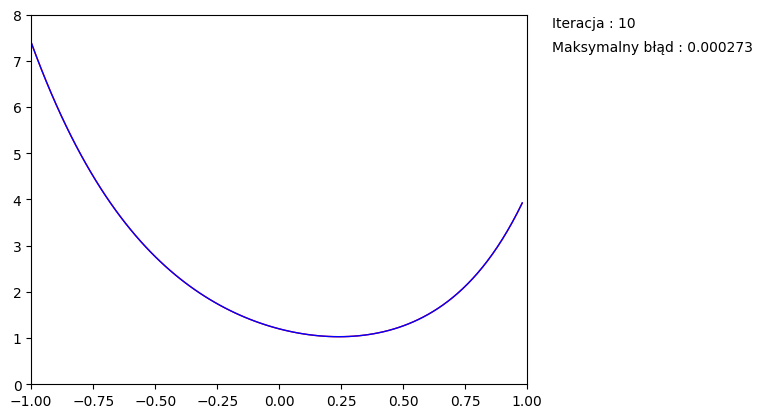

In [77]:
function f(y, x) 
    e^(3x) - 2y
end

function solution(x)
    e^(-2x) + (e^(3x))/5
end
animate(f, solution, x0=0.0, y0=1.2, iters=10, N=10, ymin=0, ymax=8)

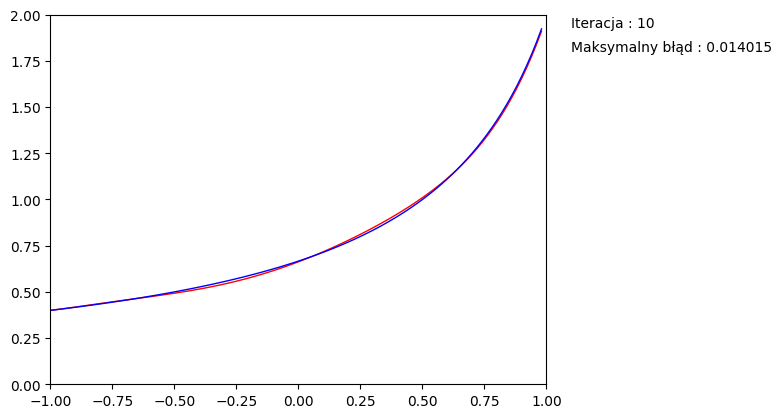

In [76]:
function f(y, x) 
    y^2
end

function solution(x)
    1/(3/2 - x)
end

animate(f, solution, N=5, iters=10, x0=-1, y0=0.4, ymax=2)